In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pylab
import math
import random
import pandas as pd
import sklearn

%matplotlib inline
sns.set()

In [2]:
#!pip install seaborn --upgrade

In [86]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Краснодар/Выборка_Краснодар.xlsx', sheet_name = 0)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Прогноз(0.5),Прогноз(0.32),pred_proba_2,pred_proba_1,Цена,...,Исп.2,Unnamed: 63,Сцепка_3,Сцепка_4,Д_ад,Д_ya,Сравнение,Поиск,Текст,Ссылка
0,1_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12000000,...,NaN,NaN,9,NaN,3к2,NaN,NaN,0.0,"Продается отличная, большая, просторная кварти...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,2_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3700000,...,NaN,NaN,11 39.005982 45.099499,NaN,13,13,1.0,0.0,Продаётся уютная квартира в шикарном жк Победн...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
2,3_avito,0,0,0.0,0.0,0.0,0.0,0.005016,0.994984,8399000,...,NaN,3.0,5 39.036192 45.010981,"65,5 5 39.036192 45.010981",132,132,1.0,0.0,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
3,4_avito,1,0,NaN,NaN,NaN,NaN,NaN,NaN,12300000,...,NaN,NaN,4,NaN,39/2,NaN,NaN,0.0,Срочная Продажа! Продается большая трехкомнатн...,https://www.avito.ru/krasnodar/kvartiry/3-k._k...
4,5_avito,0,0,0.0,0.0,0.0,0.0,0.060823,0.939177,11000000,...,NaN,17.0,15 38.970992 45.101935,92 15 38.970992 45.101935,4/4,4/4,1.0,0.0,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,34260_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,6100000,...,NaN,72.0,4 39.03868 45.079091,"36,9 4 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10785272/
34264,34261_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5998000,...,NaN,32.0,17 39.043307 45.078162,40 17 39.043307 45.078162,NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10541705/
34265,34262_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5500000,...,NaN,72.0,17 39.03868 45.079091,"36,6 17 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10355115/
34266,34259_avito,0,0,0.0,0.0,0.0,0.0,NaN,NaN,5369000,...,NaN,72.0,20 39.03868 45.079091,"36,6 20 39.03868 45.079091",NaN,NaN,NaN,NaN,NaN,https://krasnodar.etagi.com/realty/10328304/


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34268 entries, 0 to 34267
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                34268 non-null  object 
 1   All               34268 non-null  int64  
 2   Мусор             34268 non-null  int64  
 3   Мусор_1           24102 non-null  float64
 4   Мусор_2           24106 non-null  float64
 5   Прогноз(0.5)      21414 non-null  float64
 6   Прогноз(0.32)     21414 non-null  float64
 7   pred_proba_2      21408 non-null  float64
 8   pred_proba_1      21408 non-null  float64
 9   Цена              34268 non-null  int64  
 10  Цена_перв         146 non-null    float64
 11  LN(Цена)          34268 non-null  float64
 12  Цена(кв.м)        34268 non-null  float64
 13  Цена_об           34262 non-null  object 
 14  Прогноз           13609 non-null  float64
 15  Цена(кв.м).1      13609 non-null  float64
 16  MAE               13609 non-null  float6

In [89]:
#фильтр
df.columns

Index(['ID', 'All', 'Мусор', 'Мусор_1', 'Мусор_2', 'Прогноз(0.5)',
       'Прогноз(0.32)', 'pred_proba_2', 'pred_proba_1', 'Цена', 'Цена_перв',
       'LN(Цена)', 'Цена(кв.м)', 'Цена_об', 'Прогноз', 'Цена(кв.м).1', 'MAE',
       'MAPE', 'Выбросы', 'Исп_2', 'Исп', 'Комм', 'Комнатность', 'ОПлощадь',
       'Этаж_1', 'Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_1', 'Этажность_2',
       'Этаж/этажность', 'ГП_1', 'ГП_2', 'Минжкх', 'П', 'Аварийный', 'Ремонт',
       'Ремонт_2', 'Ремонт_3', 'Исп.1', 'Раст_центр_1', 'Раст_центр_2',
       'Районы_1', 'Районы_2', 'ЖК_БД', 'Многоуровневость', 'Терраса',
       'Пентхаус', 'dup_all', 'dup_1', 'dup_2', 'dup_3', 'dup_4', 'dup_res',
       'Инфо', 'Адрес', 'Unnamed: 56', 'Адрес_итог', 'Адрес_Ya', 'Долгота',
       'Широта', 'Сцепка_к', 'Исп.2', 'Unnamed: 63', 'Сцепка_3', 'Сцепка_4',
       'Д_ад', 'Д_ya', 'Сравнение', 'Поиск', 'Текст', 'Ссылка'],
      dtype='object')

In [90]:
df = df[df['Мусор'] == 0]
df = df[df['dup_res'] == 0]

In [91]:
df['ГП_1'] = df['ГП_1'].astype(int)
df['ГП_1'].info()

<class 'pandas.core.series.Series'>
Int64Index: 13579 entries, 2 to 34267
Series name: ГП_1
Non-Null Count  Dtype
--------------  -----
13579 non-null  int32
dtypes: int32(1)
memory usage: 159.1 KB


In [92]:
df['Районы_2'].isnull().sum()

0

In [93]:
df['Районы_2'].unique()

array(['Черемушки', 'Энка', 'Западный_обход', 'Российский_Ипподром',
       'Славянский_Микрохирургии_глаза', 'Фестивальный',
       'ЗИП_Московский_40_лет_Победы', 'Восточно_Кругликовский_ККБ',
       'Юбилейный_СХИ_Кожзавод', 'Березовый_Северный_Молодёжный',
       'Комсомольский_КСК_ТЭЦ', 'Баскет_холл_Горхутор', 'Аврора',
       'Панорама', 'Центр', 'Гидростроителей', 'Музыкальный',
       'Немецкая_деревня_Колосистый', 'Пашковский',
       'Краснодарский_Плодородный', 'Авиагородок_9_й_километр_Репино',
       'Школьный_Табачная_фабрика', 'Знаменский_Новознаменский', 'ХБК',
       '2_я_Площадка', 'Горгаз', 'Любимово', 'Поселки_Рубероидный', 'НД'],
      dtype=object)

In [94]:
df_1 = df[df['Районы_2'] == 'Западный_обход']
len(df_1)

1027

In [95]:
df_1['Ремонт_3'].value_counts(sort = True, ascending = False)

предчистовая       592
стандартный        262
без_отделки        104
экономный           39
улучшенный          25
требует_ремонта      5
Name: Ремонт_3, dtype: int64

# График для площади

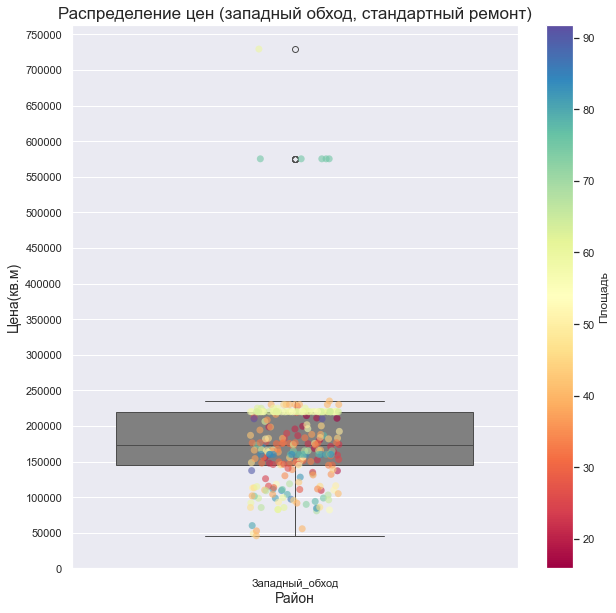

In [31]:
from matplotlib.cm import ScalarMappable

n_colors = len(df_1[df_1['Ремонт_3'] == 'стандартный']['ОПлощадь'].value_counts(sort = True, ascending = False))
mini = df_1[df_1['Ремонт_3'] == 'стандартный']['ОПлощадь'].min()
maxi = df_1[df_1['Ремонт_3'] == 'стандартный']['ОПлощадь'].max()

norm = plt.Normalize(
                     mini, 
                     maxi
                     )
cmap = plt.get_cmap("Spectral") #Spectral, seismic

cpal = sns.color_palette('Spectral', n_colors = n_colors, desat = 1)

fig, ax = plt.subplots(figsize = (10, 10)) #ширина и высота

#создаем boxplot
ax = sns.boxplot(
                 x = "Районы_2", 
                 y = "Цена(кв.м)", 
                 data = df_1[df_1['Ремонт_3'] == 'стандартный'],
                 color = 'grey',
                 ) 
  
#создаем strip plot 
ax = sns.stripplot(
                   x = "Районы_2", 
                   y = "Цена(кв.м)",
                   hue = "ОПлощадь",
                   #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
                   #orient = "h",
                   #col = "day",       #тут можно указать районы и не сортировать их
                   color = [cmap(norm(df_1[df_1['Ремонт_3'] == 'стандартный']['ОПлощадь']))], #'black',
                   alpha = 0.6, 
                   data = df_1[df_1['Ремонт_3'] == 'стандартный'],
                   #jitter = (0, 0.65, 0.05), #True/False
                   #linewidth = 2,
                   #marker = '*',
                   palette = 'Spectral', #cpal, #Spectral, seismic
                   edgecolor = 'none',
                   s = 7
                   )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm = ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

fig.colorbar(
             sm, 
             ax = ax, 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

ax.get_legend().remove() #отключаем легенду

#plt.xticks(np.arange(0,151,25))
plt.yticks(np.arange(0, 800000, 50000))

plt.title("Распределение цен (западный обход, стандартный ремонт)", size = 17)
plt.xlabel("Район", size = 14)
plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

# График для года постройки

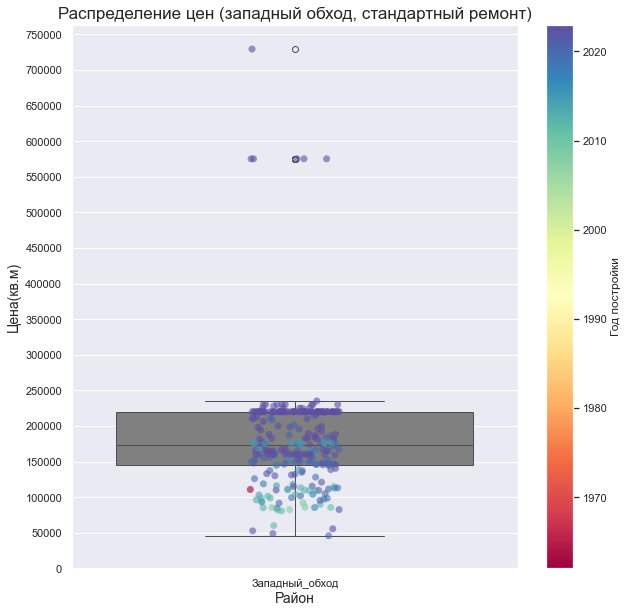

In [96]:
from matplotlib.cm import ScalarMappable

n_colors = len(df_1[df_1['Ремонт_3'] == 'стандартный']['ГП_1'].value_counts(sort = True, ascending = False))
mini = df_1[df_1['Ремонт_3'] == 'стандартный']['ГП_1'].min()
maxi = df_1[df_1['Ремонт_3'] == 'стандартный']['ГП_1'].max()

norm = plt.Normalize(
                     mini, 
                     maxi
                     )
cmap = plt.get_cmap("Spectral") #Spectral, seismic

cpal = sns.color_palette('Spectral', n_colors = n_colors, desat = 1)

fig, ax = plt.subplots(figsize = (10, 10)) #ширина и высота

#создаем boxplot
ax = sns.boxplot(
                 x = "Районы_2", 
                 y = "Цена(кв.м)", 
                 data = df_1[df_1['Ремонт_3'] == 'стандартный'],
                 color = 'grey',
                 ) 
  
#создаем strip plot 
ax = sns.stripplot(
                   x = "Районы_2", 
                   y = "Цена(кв.м)",
                   hue = "ГП_1",
                   #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
                   #orient = "h",
                   #col = "day",       #тут можно указать районы и не сортировать их
                   color = [cmap(norm(df_1[df_1['Ремонт_3'] == 'стандартный']['ГП_1']))], #'black',
                   alpha = 0.6, 
                   data = df_1[df_1['Ремонт_3'] == 'стандартный'],
                   #jitter = (0, 0.65, 0.05), #True/False
                   #linewidth = 2,
                   #marker = '*',
                   palette = 'Spectral', #cpal, #Spectral, seismic
                   edgecolor = 'none',
                   s = 7
                   )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm = ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

fig.colorbar(
             sm, 
             ax = ax, 
             orientation = 'vertical', #horizontal
             label = 'Год постройки'
             )

#cbar.ax.set_title("scale")

ax.get_legend().remove() #отключаем легенду

#plt.xticks(np.arange(0,151,25))
plt.yticks(np.arange(0, 800000, 50000))

plt.title("Распределение цен (западный обход, стандартный ремонт)", size = 17)
plt.xlabel("Район", size = 14)
plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

#  Детализация по сцепке_к

In [97]:
df_1['Сцепка_к'].value_counts(sort = True, ascending = False).head(20)

38.901283 45.089903    148
38.904526 45.100682     92
38.903394 45.099486     91
38.901355 45.096788     41
38.903753 45.095713     30
38.907859 45.100109     26
38.905182 45.101363     25
38.917956 45.093766     24
38.905658 45.093702     21
38.903124 45.091933     20
38.915638 45.092716     20
38.914281 45.092805     19
38.899639 45.090005     18
38.908371 45.096852     18
38.905891 45.096209     18
38.90095 45.089394      17
38.914632 45.09451      16
38.91005 45.093505      14
38.89998 45.08935       13
38.905676 45.09542      13
Name: Сцепка_к, dtype: int64

In [98]:
df_2 = df_1[df_1['Сцепка_к'] == '38.901283 45.089903']
len(df_2)

148

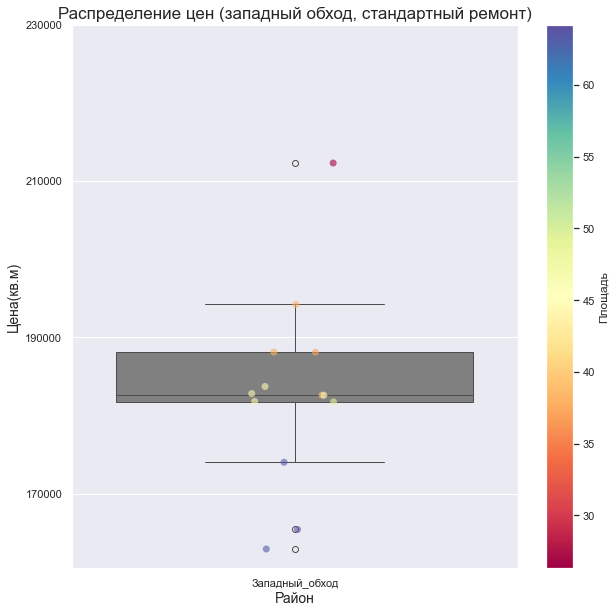

In [99]:
from matplotlib.cm import ScalarMappable

n_colors = len(df_2[df_2['Ремонт_3'] == 'стандартный']['ОПлощадь'].value_counts(sort = True, ascending = False))
mini = df_2[df_2['Ремонт_3'] == 'стандартный']['ОПлощадь'].min()
maxi = df_2[df_2['Ремонт_3'] == 'стандартный']['ОПлощадь'].max()

norm = plt.Normalize(
                     mini, 
                     maxi
                     )
cmap = plt.get_cmap("Spectral") #Spectral, seismic

cpal = sns.color_palette('Spectral', n_colors = n_colors, desat = 1)

fig, ax = plt.subplots(figsize = (10, 10)) #ширина и высота

#создаем boxplot
ax = sns.boxplot(
                 x = "Районы_2", 
                 y = "Цена(кв.м)", 
                 data = df_2[df_2['Ремонт_3'] == 'стандартный'],
                 color = 'grey',
                 ) 
  
#создаем strip plot 
ax = sns.stripplot(
                   x = "Районы_2", 
                   y = "Цена(кв.м)",
                   hue = "ОПлощадь",
                   #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
                   #orient = "h",
                   #col = "day",       #тут можно указать районы и не сортировать их
                   color = [cmap(norm(df_2[df_2['Ремонт_3'] == 'стандартный']['ОПлощадь']))], #'black',
                   alpha = 0.6, 
                   data = df_2[df_2['Ремонт_3'] == 'стандартный'],
                   #jitter = (0, 0.65, 0.05), #True/False
                   #linewidth = 2,
                   #marker = '*',
                   palette = 'Spectral', #cpal, #Spectral, seismic
                   edgecolor = 'none',
                   s = 7
                   )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm = ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

fig.colorbar(
             sm, 
             ax = ax, 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

ax.get_legend().remove() #отключаем легенду

#plt.xticks(np.arange(0,151,25))
plt.yticks(np.arange(170000, 250000, 20000))

plt.title("Распределение цен (западный обход, стандартный ремонт)", size = 17)
plt.xlabel("Район", size = 14)
plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

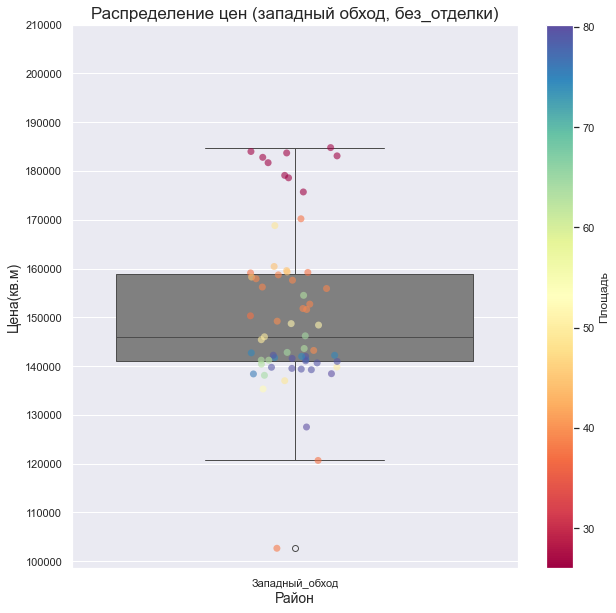

In [100]:
from matplotlib.cm import ScalarMappable

n_colors = len(df_2[df_2['Ремонт_3'] == 'без_отделки']['ОПлощадь'].value_counts(sort = True, ascending = False))
mini = df_2[df_2['Ремонт_3'] == 'без_отделки']['ОПлощадь'].min()
maxi = df_2[df_2['Ремонт_3'] == 'без_отделки']['ОПлощадь'].max()

norm = plt.Normalize(
                     mini, 
                     maxi
                     )
cmap = plt.get_cmap("Spectral") #Spectral, seismic

cpal = sns.color_palette('Spectral', n_colors = n_colors, desat = 1)

fig, ax = plt.subplots(figsize = (10, 10)) #ширина и высота

#создаем boxplot
ax = sns.boxplot(
                 x = "Районы_2", 
                 y = "Цена(кв.м)", 
                 data = df_2[df_2['Ремонт_3'] == 'без_отделки'],
                 color = 'grey',
                 ) 
  
#создаем strip plot 
ax = sns.stripplot(
                   x = "Районы_2", 
                   y = "Цена(кв.м)",
                   hue = "ОПлощадь",
                   #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
                   #orient = "h",
                   #col = "day",       #тут можно указать районы и не сортировать их
                   color = [cmap(norm(df_2[df_2['Ремонт_3'] == 'без_отделки']['ОПлощадь']))], #'black',
                   alpha = 0.6, 
                   data = df_2[df_2['Ремонт_3'] == 'без_отделки'],
                   #jitter = (0, 0.65, 0.05), #True/False
                   #linewidth = 2,
                   #marker = '*',
                   palette = 'Spectral', #cpal, #Spectral, seismic
                   edgecolor = 'none',
                   s = 7
                   )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm = ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

fig.colorbar(
             sm, 
             ax = ax, 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

ax.get_legend().remove() #отключаем легенду

#plt.xticks(np.arange(0,151,25))
plt.yticks(np.arange(100000, 220000, 10000))

plt.title("Распределение цен (западный обход, без_отделки)", size = 17)
plt.xlabel("Район", size = 14)
plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

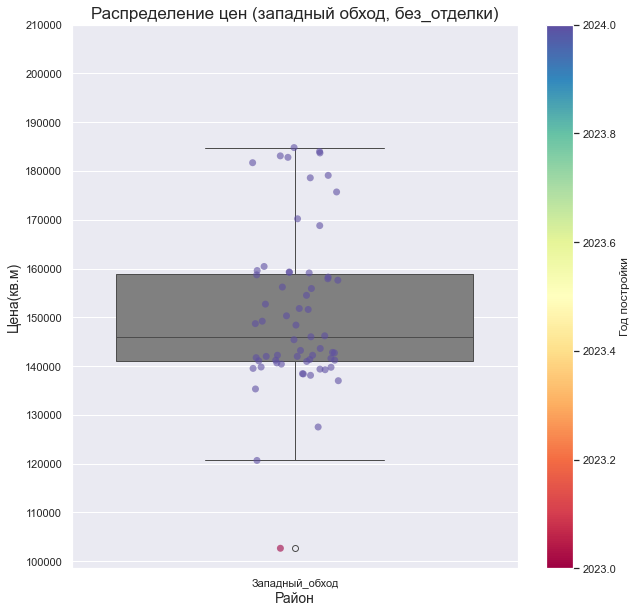

In [135]:
from matplotlib.cm import ScalarMappable

n_colors = len(df_2[df_2['Ремонт_3'] == 'без_отделки']['ГП_1'].value_counts(sort = True, ascending = False))
mini = df_2[df_2['Ремонт_3'] == 'без_отделки']['ГП_1'].min()
maxi = df_2[df_2['Ремонт_3'] == 'без_отделки']['ГП_1'].max()

# if (maxi - mini) < 5:
#     mini = mini - 5
#     maxi = maxi + 1

norm = plt.Normalize(
                     mini, 
                     maxi
                     )
cmap = plt.get_cmap("Spectral") #Spectral, seismic

cpal = sns.color_palette('Spectral', n_colors = n_colors, desat = 1)

fig, ax = plt.subplots(figsize = (10, 10)) #ширина и высота

#создаем boxplot
ax = sns.boxplot(
                 x = "Районы_2", 
                 y = "Цена(кв.м)", 
                 data = df_2[df_2['Ремонт_3'] == 'без_отделки'],
                 color = 'grey',
                 ) 
  
#создаем strip plot 
ax = sns.stripplot(
                   x = "Районы_2", 
                   y = "Цена(кв.м)",
                   hue = "ГП_1",
                   #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
                   #orient = "h",
                   #col = "day",       #тут можно указать районы и не сортировать их
                   color = [cmap(norm(df_2[df_2['Ремонт_3'] == 'без_отделки']['ГП_1']))], #'black',
                   alpha = 0.6, 
                   data = df_2[df_2['Ремонт_3'] == 'без_отделки'],
                   #jitter = (0, 0.65, 0.05), #True/False
                   #linewidth = 2,
                   #marker = '*',
                   palette = 'Spectral', #cpal, #Spectral, seismic
                   edgecolor = 'none',
                   s = 7
                   )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm = ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

fig.colorbar(
             sm, 
             ax = ax, 
             orientation = 'vertical', #horizontal
             label = 'Год постройки'
             )

#cbar.ax.set_title("scale")

ax.get_legend().remove() #отключаем легенду

#plt.xticks(np.arange(0,151,25))
plt.yticks(np.arange(100000, 220000, 10000))

plt.title("Распределение цен (западный обход, без_отделки)", size = 17)
plt.xlabel("Район", size = 14)
plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

In [136]:
df_3 = df_1[df_1['Сцепка_к'] == '38.904526 45.100682']
print(len(df_3))
df_3['Ремонт_3'].value_counts(sort = True, ascending = False)

92


предчистовая    68
стандартный     23
улучшенный       1
Name: Ремонт_3, dtype: int64

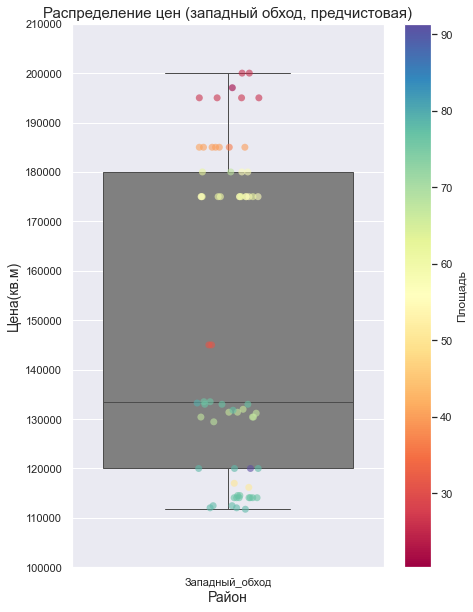

In [137]:
from matplotlib.cm import ScalarMappable

n_colors = len(df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь'].value_counts(sort = True, ascending = False))
mini = df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь'].min()
maxi = df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь'].max()

norm = plt.Normalize(
                     mini, 
                     maxi
                     )
cmap = plt.get_cmap("Spectral") #Spectral, seismic

cpal = sns.color_palette('Spectral', n_colors = n_colors, desat = 1)

fig, ax = plt.subplots(figsize = (7, 10)) #ширина и высота

#создаем boxplot
ax = sns.boxplot(
                 x = "Районы_2", 
                 y = "Цена(кв.м)", 
                 data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
                 color = 'grey',
                 ) 
  
#создаем strip plot 
ax = sns.stripplot(
                   x = "Районы_2", 
                   y = "Цена(кв.м)",
                   hue = "ОПлощадь",
                   #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
                   #orient = "h",
                   #col = "day",       #тут можно указать районы и не сортировать их
                   color = [cmap(norm(df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь']))], #'black',
                   alpha = 0.6, 
                   data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
                   #jitter = (0, 0.65, 0.05), #True/False
                   #linewidth = 2,
                   #marker = '*',
                   palette = 'Spectral', #cpal, #Spectral, seismic
                   edgecolor = 'none',
                   s = 7
                   )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm = ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

fig.colorbar(
             sm, 
             ax = ax, 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

ax.get_legend().remove() #отключаем легенду

#plt.xticks(np.arange(0,151,25))
plt.yticks(np.arange(100000, 220000, 10000))

plt.title("Распределение цен (западный обход, предчистовая)", size = 15)
plt.xlabel("Район", size = 14)
plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

#добавить справа график с годом постройки

У всех квартир одинаковый год 2023!


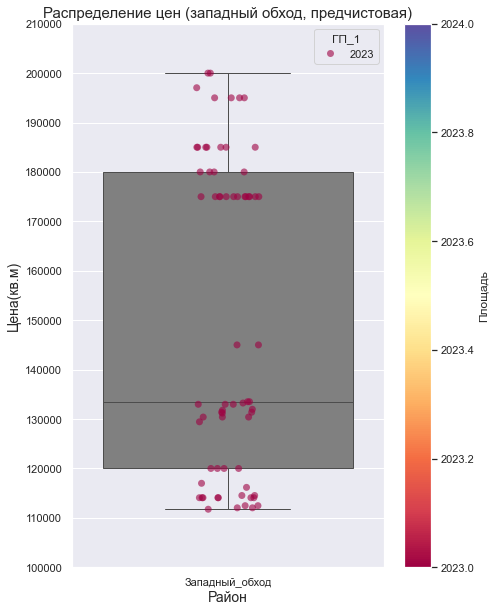

In [147]:
from matplotlib.cm import ScalarMappable

n_colors = len(df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1'].value_counts(sort = True, ascending = False))
mini = df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1'].min()
maxi = df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1'].max()

if maxi == mini:
    mini = mini
    maxi = maxi + 1
    print(f'У всех квартир одинаковый год {mini}!')

norm = plt.Normalize(
                     mini, 
                     maxi
                     )
cmap = plt.get_cmap("Spectral") #Spectral, seismic

cpal = sns.color_palette('Spectral', n_colors = n_colors, desat = 1)

fig, ax = plt.subplots(figsize = (7, 10)) #ширина и высота

#создаем boxplot
ax = sns.boxplot(
                 x = "Районы_2", 
                 y = "Цена(кв.м)", 
                 data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
                 color = 'grey',
                 ) 
  
#создаем strip plot 
ax = sns.stripplot(
                   x = "Районы_2", 
                   y = "Цена(кв.м)",
                   hue = "ГП_1",
                   #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
                   #orient = "h",
                   #col = "day",       #тут можно указать районы и не сортировать их
                   color = [cmap(norm(df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1']))], #'black',
                   alpha = 0.6, 
                   data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
                   #jitter = (0, 0.65, 0.05), #True/False
                   #linewidth = 2,
                   #marker = '*',
                   palette = 'Spectral', #cpal, #Spectral, seismic
                   edgecolor = 'none',
                   s = 7
                   )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm = ScalarMappable(norm = norm, cmap = cmap)
sm.set_array([])

fig.colorbar(
             sm, 
             ax = ax, 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

#ax.get_legend().remove() #отключаем легенду

#plt.xticks(np.arange(0,151,25))
plt.yticks(np.arange(100000, 220000, 10000))

plt.title("Распределение цен (западный обход, предчистовая)", size = 15)
plt.xlabel("Район", size = 14)
plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

У всех квартир одинаковый год 2023!


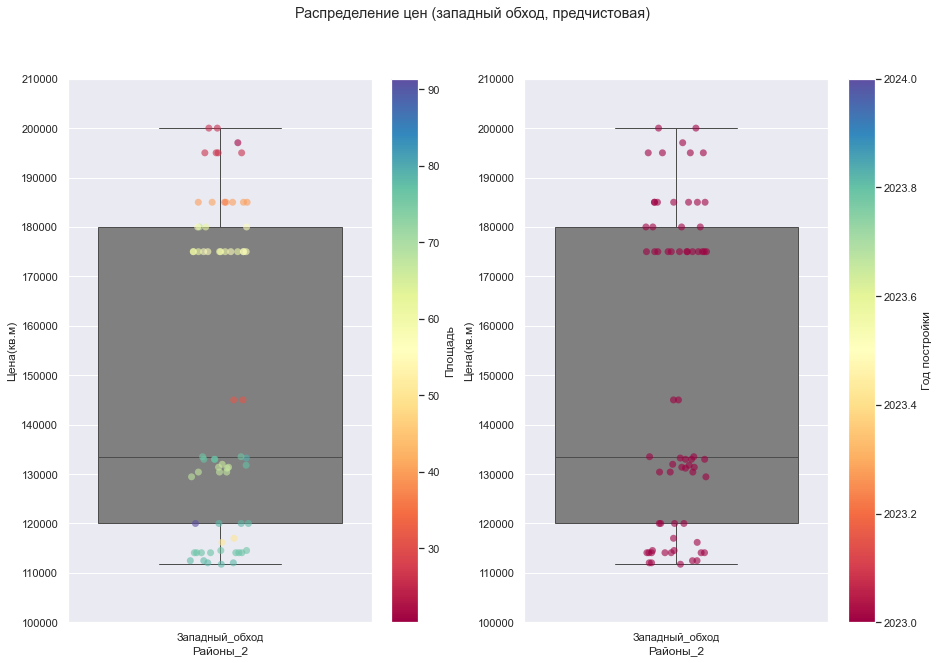

In [149]:
from matplotlib.cm import ScalarMappable

n_colors_s = len(df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь'].value_counts(sort = True, ascending = False))
n_colors_y = len(df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1'].value_counts(sort = True, ascending = False))


mini_s = df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь'].min()
maxi_s = df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь'].max()
mini_y = df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1'].min()
maxi_y = df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1'].max()

if maxi_y == mini_y:
    mini_y = mini_y
    maxi_y = maxi_y + 1
    print(f'У всех квартир одинаковый год {mini_y}!')
    
if maxi_s == mini_s:
    maxi_s = mini_s
    maxi_s = mini_s + 1
    print(f'У всех квартир одинаковая площадь {mini_s}!')

norm_s = plt.Normalize(
                       mini_s, 
                       maxi_s
                       )

norm_y = plt.Normalize(
                       mini_y, 
                       maxi_y
                       )

cmap = plt.get_cmap("Spectral") #Spectral, seismic

#cpal_s = sns.color_palette('Spectral', n_colors = n_colors_s, desat = 1)
#cpal_y = sns.color_palette('Spectral', n_colors = n_colors_y, desat = 1)

fig, ax = plt.subplots(1, 2, figsize = (15, 10)) #1 строка и 2 столбика, figsize = ширина и высота, sharex=True,

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "Цена(кв.м)", 
            data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
            color = 'grey',
            ax = ax[0]
            ) 
  
#создаем strip plot для площади
sns.stripplot(
              x = "Районы_2", 
              y = "Цена(кв.м)",
              hue = "ОПлощадь",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_s(df_3[df_3['Ремонт_3'] == 'предчистовая']['ОПлощадь']))], #'black',
              alpha = 0.6, 
              data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[0]
              )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm_s = ScalarMappable(norm = norm_s, cmap = cmap)
sm_s.set_array([])

fig.colorbar(
             sm_s, 
             ax = ax[0], 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "Цена(кв.м)", 
            data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
            color = 'grey',
            ax = ax[1]
            ) 

#создаем strip plot для ГП
sns.stripplot(
              x = "Районы_2", 
              y = "Цена(кв.м)",
              hue = "ГП_1",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_y(df_3[df_3['Ремонт_3'] == 'предчистовая']['ГП_1']))], #'black',
              alpha = 0.6, 
              data = df_3[df_3['Ремонт_3'] == 'предчистовая'],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[1]
              )
#sns.despine() #удаляет полосы с графика

sm_y = ScalarMappable(norm = norm_y, cmap = cmap)
sm_y.set_array([])

fig.colorbar(
             sm_y, 
             ax = ax[1], 
             orientation = 'vertical', #horizontal
             label = 'Год постройки'
             )

ax[0].get_legend().remove() #отключаем легенду у площади
ax[1].get_legend().remove() #отключаем легенду у ГП

#plt.xticks(np.arange(0,151,25))
ax[0].set_yticks(np.arange(100000, 220000, 10000))
ax[1].set_yticks(np.arange(100000, 220000, 10000))

fig.suptitle('Распределение цен (западный обход, предчистовая)')
#plt.title("Распределение цен (западный обход, предчистовая)", size = 15)
#plt.xlabel("Район", size = 14)
#plt.ylabel("Цена(кв.м)", size = 14)
plt.show()


# Pointplot

<AxesSubplot: xlabel='Ремонт_3', ylabel='Цена(кв.м)'>

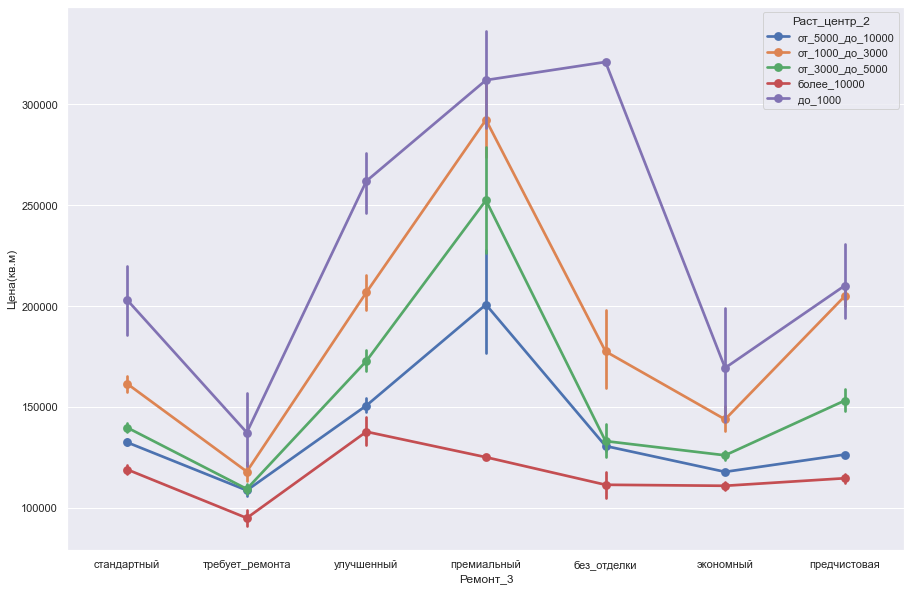

In [51]:
plt.figure(figsize = (15, 10)) #ширина и высота

sns.pointplot(
              data = df,
              x = "Ремонт_3", 
              y = "Цена(кв.м)", 
              hue = "Раст_центр_2",
              #markers = ["o", "s"], 
              #linestyles = ["-", "--"],
             )

<AxesSubplot: xlabel='Ремонт_3', ylabel='Цена(кв.м)'>

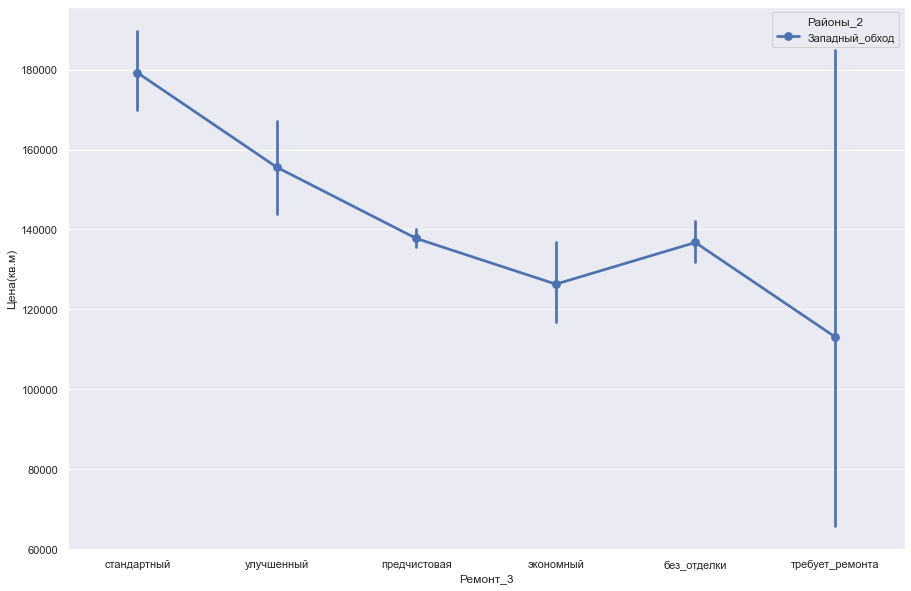

In [54]:
plt.figure(figsize = (15, 10)) #ширина и высота

sns.pointplot(
              data = df_1,
              x = "Ремонт_3", 
              y = "Цена(кв.м)", 
              hue = "Районы_2",
              #markers = ["o", "s"], 
              #linestyles = ["-", "--"],
             )

#есть идея добавить сюда stripplot (отразим точки) и colorbar (по площади)

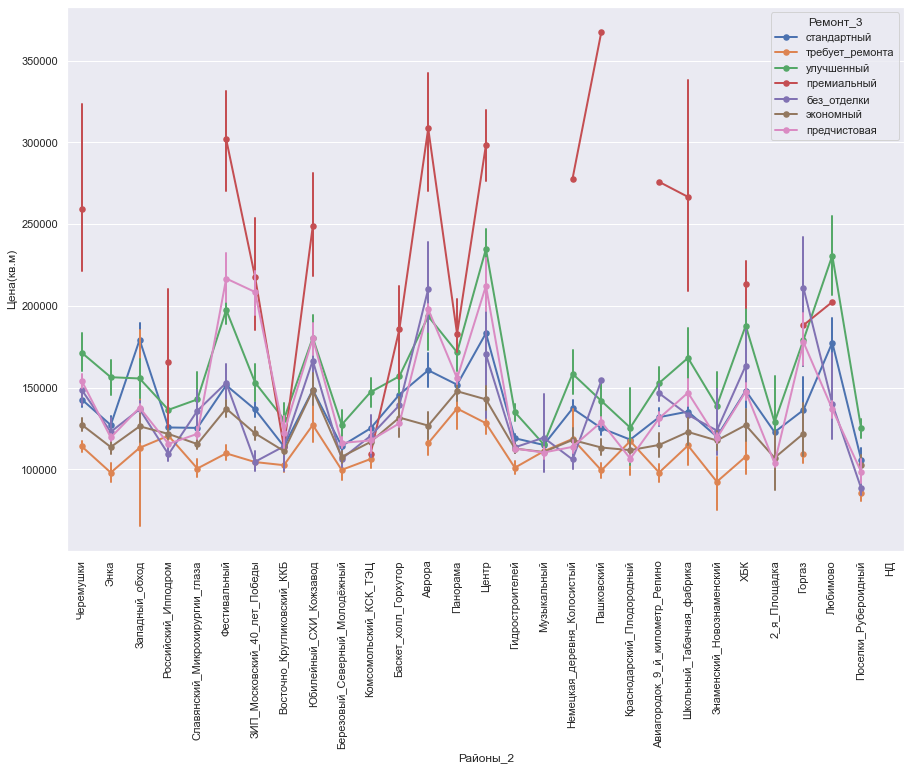

In [61]:
plt.figure(figsize = (15, 10)) #ширина и высота

sns.pointplot(
              data = df,
              x = "Районы_2", 
              y = "Цена(кв.м)", 
              hue = "Ремонт_3",
              #markers = ["o", "s"], 
              #linestyles = ["-", "--"],
              linewidth = 2
             )

plt.xticks(rotation = 90)
plt.show()